In [1]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
import random


# 





In [2]:

# cross-validation  with baseline include 0 class . accuracy =1- err  err=abs(y_pred-y_test)/3  

def valid(x,y,opt):
    if x.shape[1] == 15 :
        featureName=['VarBR','Varpp','VarIn','VarEx', 'meanBR',\
             'meanIn', 'meanEx' ,'r1 BR','r1 PP','r1 IN','r1 EX','r2 BR','r2 PP','r2 IN','r2 EX']
    if x.shape[1] == 18 :
        featureName=['CovBR','CovPP','CovIN','CovEX', 'meanBR',\
             'meanIN', 'meanEX' ,'r1 BR','r1 PP','r1 IN','r1 EX','r2 BR','r2 PP','r2 IN','r2 EX',\
            'meanHR','sdnn','rmsrr']
    acc=[]
    impt=[]
    scale=y[0,:]
    group=y[1,:]
    acc_max_temp=0  
    tree_max=[]
    a=opt[2]
    b=opt[3]
    if opt[0]=='kfold':
        rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

        
        for train_ind, test_ind in rkf.split(x,scale):
            #print("%s %s" % (train_ind, test_ind))
            #print(test_ind)
            X_train=x[train_ind] 
            X_test=x[test_ind]
            y_train=scale[train_ind] 
            y_test=scale[test_ind]
            
            acc_temp=np.zeros((8,))
            impt_temp=np.zeros((8,x.shape[1]))
            
            
            for i in range(8):
                if  opt[1]=='tree':
                    tree1 = DecisionTreeClassifier(max_depth=a).fit(X_train,y_train)
                if  opt[1]=='forest':
                    tree1 = RandomForestClassifier(max_depth=b,n_estimators=40,max_features=None).fit(X_train,y_train)

                y_p=tree1.predict(X_test)
                acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/3
                
                acc_temp[i]=np.mean(acc_t)
                impt_temp[i,:]=tree1.feature_importances_
                if acc_temp[i] >= acc_max_temp:
                    acc_max_temp=acc_temp[i]
                    tree_max.append(tree1)

            max=np.max(acc_temp)
            ind=np.where(acc_temp == np.amax(acc_temp))
            ind=np.min(ind)
            impt_max=impt_temp[ind,:]
            acc.append(max) 
            impt.append(impt_max)


    if opt[0]=='group':
        rkf = LeaveOneGroupOut()

        for train_ind, test_ind in rkf.split(x,scale,group):
            #print("%s %s" % (train_ind, test_ind))
            #print(test_ind)
            X_train=x[train_ind] 
            X_test=x[test_ind]
            y_train=scale[train_ind] 
            y_test=scale[test_ind]
            
            acc_temp=np.zeros((8,))
            impt_temp=np.zeros((8,x.shape[1]))
            
             
            for i in range(8):
                if  opt[1]=='tree':
                    tree1 = DecisionTreeClassifier(max_depth=a).fit(X_train,y_train)
                if  opt[1]=='forest':
                    tree1 = RandomForestClassifier(max_depth=b,n_estimators=40,max_features=None).fit(X_train,y_train)

                y_p=tree1.predict(X_test)
                acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/3
                acc_temp[i]=np.mean(acc_t)
                impt_temp[i,:]=tree1.feature_importances_
                if acc_temp[i] >= acc_max_temp:
                    acc_max_temp=acc_temp[i]
                    tree_max.append(tree1)

            max=np.max(acc_temp)
            ind=np.where(acc_temp == np.amax(acc_temp))
            ind=np.min(ind)
            impt_max=impt_temp[ind,:]
            acc.append(max) 
            impt.append(impt_max)

    impt=np.array(impt) 
    importance1=np.mean(impt,axis=0)
    seq=np.argsort(importance1)
    featureName=np.array(featureName)
    featureName1=featureName[seq]
    importance1=importance1[seq]
    importance1=np.flip(importance1)
    featureName1=np.flip(featureName1)
        
    acc=np.array(acc)
    acc_mean=np.mean(acc)
    print('{n:.3f}'.format(n=acc_mean))
    
    return acc_mean,featureName1,importance1,tree_max,acc_max_temp


In [3]:
# cross-validation  with baseline exclude 0 class . accuracy =1- err  err=abs(y_pred-y_test)/2
def valid_wo(x,y,opt):
    if x.shape[1] == 15 :
        featureName=['VarBR','Varpp','VarIn','VarEx', 'meanBR',\
             'meanIn', 'meanEx' ,'r1 BR','r1 PP','r1 IN','r1 EX','r2 BR','r2 PP','r2 IN','r2 EX']
    if x.shape[1] == 18 :
        featureName=['CovBR','CovPP','CovIN','CovEX', 'meanBR',\
             'meanIN', 'meanEX' ,'r1 BR','r1 PP','r1 IN','r1 EX','r2 BR','r2 PP','r2 IN','r2 EX',\
            'meanHR','sdnn','rmsrr']
    acc=[]
    impt=[]
    scale=y[0,:]
    group=y[1,:]
    acc_max_temp=0  
    seed=10
    tree_max=[]
    a=opt[2]
    b=opt[3]
    if opt[0]=='kfold':
        rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

        
        for train_ind, test_ind in rkf.split(x,scale):
            #print("%s %s" % (train_ind, test_ind))
            #print(test_ind)
            X_train=x[train_ind] 
            X_test=x[test_ind]
            y_train=scale[train_ind] 
            y_test=scale[test_ind]
            
            acc_temp=np.zeros((8,))
            impt_temp=np.zeros((8,x.shape[1]))
            
            
            for i in range(8):
                if  opt[1]=='tree':
                    tree1 = DecisionTreeClassifier(max_depth=a).fit(X_train,y_train)
                if  opt[1]=='forest':
                    tree1 = RandomForestClassifier(max_depth=b,n_estimators=40,max_features=None).fit(X_train,y_train)

                y_p=tree1.predict(X_test)
                acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/2
                acc_temp[i]=np.mean(acc_t)
                impt_temp[i,:]=tree1.feature_importances_
                if acc_temp[i] >= acc_max_temp:
                    acc_max_temp=acc_temp[i]
                    tree_max.append(tree1)

            max=np.max(acc_temp)
            ind=np.where(acc_temp == np.amax(acc_temp))
            ind=np.min(ind)
            impt_max=impt_temp[ind,:]
            acc.append(max) 
            impt.append(impt_max)


    if opt[0]=='group':
        rkf = LeaveOneGroupOut()

        for train_ind, test_ind in rkf.split(x,scale,group):
            #print("%s %s" % (train_ind, test_ind))
            #print(test_ind)
            X_train=x[train_ind] 
            X_test=x[test_ind]
            y_train=scale[train_ind] 
            y_test=scale[test_ind]
            
            acc_temp=np.zeros((8,))
            impt_temp=np.zeros((8,x.shape[1]))
            
             
            for i in range(8):
                if  opt[1]=='tree':
                    tree1 = DecisionTreeClassifier(max_depth=a).fit(X_train,y_train)
                if  opt[1]=='forest':
                    tree1 = RandomForestClassifier(max_depth=b,n_estimators=40,max_features=None).fit(X_train,y_train)

                y_p=tree1.predict(X_test)
                acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/2
                acc_temp[i]=np.mean(acc_t)
                impt_temp[i,:]=tree1.feature_importances_
                if acc_temp[i] >= acc_max_temp:
                    acc_max_temp=acc_temp[i]
                    tree_max.append(tree1)

            max=np.max(acc_temp)
            ind=np.where(acc_temp == np.amax(acc_temp))
            ind=np.min(ind)
            impt_max=impt_temp[ind,:]
            acc.append(max) 
            impt.append(impt_max)

    impt=np.array(impt) 
    importance1=np.mean(impt,axis=0)
    seq=np.argsort(importance1)
    featureName=np.array(featureName)
    featureName1=featureName[seq]
    importance1=importance1[seq]
    importance1=np.flip(importance1)
    featureName1=np.flip(featureName1)
        
    acc=np.array(acc)
    acc_mean=np.mean(acc)
    print('{n:.3f}'.format(n=acc_mean))
    
    return acc_mean,featureName1,importance1,tree_max,acc_max_temp

In [16]:
# 18 features include ECG  include NCS and chest belt 
# generate the best decision tree with highest accuracy & calculate mean accuracy
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_norm.mat")
delta_norm = data['delta2']
scale_norm = data['scale2_n'].ravel()
group_norm = data['group_norm'].ravel()
y1=np.stack((scale_norm, group_norm))
opt=['kfold','tree',5,5]
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_wo.mat")
delta_wo = data['delta2']
scale_wo = data['scale2_n'].ravel()
group_wo = data['group_wo'].ravel()
y2=np.stack((scale_wo, group_wo))
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data01.mat")
feat = data['feat2']
scale_feat = data['scale2_n'].ravel()
group = data['group'].ravel()
y3=np.stack((scale_feat, group))


# (accuracy,featurenameRank,importanceRank,treeList,accOfTreeList)=valid(x,y,opt)  
# opt=['kfold','forest',max_depth_tree,max_depth_forest]
acc1,feature1,importance1,tree1,accMax1=valid(delta_norm,y1,opt)
acc2,feature2,importance2,tree2,accMax2=valid_wo(delta_wo,y2,opt)
acc3,feature3,importance3,tree3,accMax3=valid(feat,y3,opt)

data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_test.mat")
delta_Ncs_test = data['deltaNcs']
delta_Bio_test = data['deltaBio']
delta2_test=np.concatenate((delta_Ncs_test, delta_Bio_test),axis=0)
scale_test= data['scale_n'].ravel()
scale2_test=np.stack((scale_test, scale_test)).ravel()


#(accuracy,y=[y_test, y_p],bestTreeInd)=test(x_test,y_test,treeList)
#acc,label,tree_ind=test(delta2_test,scale2_test,tree1)
#acc,label,tree_ind=test(delta2_test,scale2_test,tree2)

#(accuracy,y=[y_test, y_p])=test_vote(x_test,y_test,treeList)
acc,label=test_vote(delta2_test,scale2_test,tree1)
acc,label=test_vote(delta2_test,scale2_test,tree2)


0.866
0.906
0.813
0.854
0.812


In [5]:
from collections import Counter

def test(X_test,y_test,tree):
    acc_temp=[]
    acc_max_temp=0
    for i in range(len(tree)):
        
        y_p=tree[i].predict(X_test)
        acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/3
        
        acc_temp.append(np.mean(acc_t))
        if np.mean(acc_t) >= acc_max_temp:
            acc_max_temp=np.mean(acc_t)
            tree_max=tree[i]
            tree_max_ind=i       
            y=np.stack((y_test, y_p))
    print('{n:.3f}'.format(n=acc_max_temp))
    return acc_max_temp,y,tree_max_ind    #y = test + predict labels

def test_vote(X_test,y_test,tree):
    
    y_p_temp = []
    y_p=np.zeros((X_test.shape[0],))
    for i in range(len(tree)):
        y_p_temp.append(tree[i].predict(X_test))

    y_p_temp = np.array(y_p_temp)
    for i in range(y_p_temp.shape[1]):
        c = Counter(y_p_temp[:,i])
        y_p[i]=c.most_common(1)[0][0]
      
        
    y=np.stack((y_test, y_p))
    acc = 1-abs(y_p.astype('int')-y_test.astype('int'))/3
    acc=np.mean(acc)
    print('{n:.3f}'.format(n=acc))
    return acc,y    #y = test + predict labels

In [24]:
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_Ncs_norm.mat")
delta_norm = data['deltaNcs']
scale_norm = data['scale_n'].ravel()
group_norm = data['group_norm'].ravel()
y1=np.stack((scale_norm, group_norm))

data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_Ncs_wo.mat")
delta_wo = data['deltaNcs']
scale_wo = data['scale_n'].ravel()
group_wo = data['group_wo'].ravel()
y2=np.stack((scale_wo, group_wo))
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\dataNcs_noBase.mat")
feat = data['featNcs']
scale_feat = data['scale_n'].ravel()
group = data['group'].ravel()
y3=np.stack((scale_feat, group))

opt=['kfold','forest',6,6]

acc1,feature1,importance1,tree1,accMax1=valid(delta_norm,y1,opt)
acc2,feature2,importance2,tree2,accMax2=valid_wo(delta_wo,y2,opt)
acc3,feature3,importance3,tree3,accMax3=valid(feat,y3,opt)

data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_test.mat")
delta_Ncs_test = data['deltaNcs']
delta_Bio_test = data['deltaBio']
delta2_test=np.concatenate((delta_Ncs_test, delta_Bio_test),axis=0)
scale_test= data['scale_n'].ravel()
scale2_test=np.stack((scale_test, scale_test)).ravel()



#acc,label,tree_ind=test(delta_Ncs_test[:,0:15],scale_test,tree1)
#acc,label,tree_ind=test(delta_Ncs_test[:,0:15],scale_test,tree2)

acc,label=test_vote(delta_Ncs_test[:,0:15],scale_test,tree1)
acc,label=test_vote(delta_Ncs_test[:,0:15],scale_test,tree2)

0.870
0.901
0.726
0.792
0.875


acc1_mean=0.882
FeatureImportance1:
r1 BR=0.193
r2 BR=0.144
meanHR=0.101
r1 PP=0.084
acc2_mean=0.91
FeatureImportance2:
r1 BR=0.411
r2 BR=0.245
rmsrr=0.061
r1 IN=0.058
acc3_mean=0.84
FeatureImportance3:
rmsrr=0.230
CovBR=0.128
sdnn=0.124
meanHR=0.108


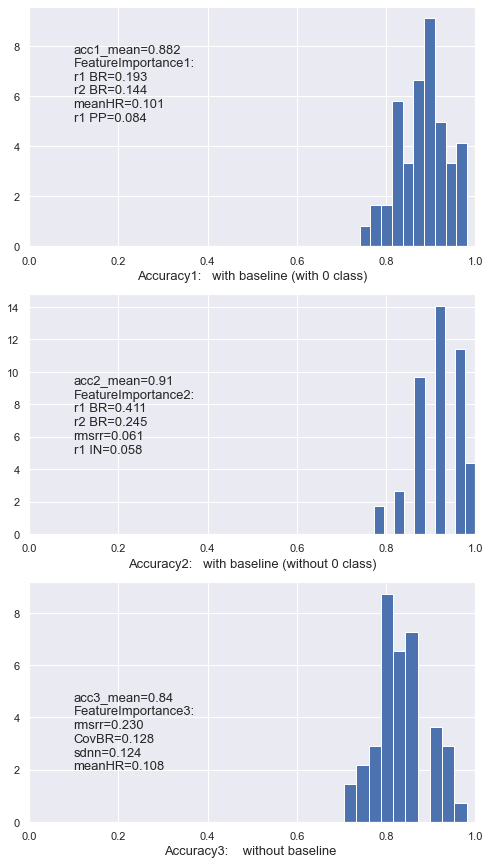

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={"figure.figsize": (8, 15)}); np.random.seed(0)
size=13
s1='acc1_mean={n:.3f}\nFeatureImportance1:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc1_mean,n1=featureName1[0],s1=importance1[0],
    n2=featureName1[1],s2=importance1[1],n3=featureName1[2],s3=importance1[2],n4=featureName1[3],s4=importance1[3])
s2='acc2_mean={n:.2f}\nFeatureImportance2:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc2_mean,n1=featureName2[0],s1=importance2[0],
    n2=featureName2[1],s2=importance2[1],n3=featureName2[2],s3=importance2[2],n4=featureName2[3],s4=importance2[3])
s3='acc3_mean={n:.2f}\nFeatureImportance3:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc3_mean,n1=featureName3[0],s1=importance3[0],
    n2=featureName3[1],s2=importance3[1],n3=featureName3[2],s3=importance3[2],n4=featureName3[3],s4=importance3[3])
plt.figure(1)
plt.subplot(3,1,1)
plt.hist(acc1, density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy1:   with baseline (with 0 class)',fontsize=size)
plt.text(0.1,5,s1,fontsize=size)
plt.subplot(3,1,2)
plt.hist(acc2, density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy2:   with baseline (without 0 class)',fontsize=size)
plt.text(0.1,5,s2,fontsize=size)
plt.subplot(3,1,3)
plt.hist(acc3, density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy3:    without baseline ',fontsize=size )
plt.text(0.1,2,s3,fontsize=size)

plt.savefig(r"C:\Sleep test\dyspnea\data\all\plot\acc_kfold.png",dpi=300)
print(s1)
print(s2)
print(s3)